## EfficientNet-B0

📄 Mingxing Tan, Quoc V. Le (2019). EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks. [link](https://arxiv.org/pdf/1905.11946)

ในงานของ Mingxing Tan และ Quoc V. Le (2019) เรื่อง “EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks” 
- ผู้เขียนได้เสนอแนวทางใหม่ในการออกแบบสถาปัตยกรรม CNN ที่มีประสิทธิภาพสูงสุดต่อพารามิเตอร์ (parameter efficiency) โดยใช้แนวคิดที่เรียกว่า Compound Scaling

- ก่อนหน้านี้ โมเดลอย่าง ResNet หรือ Inception มักจะขยายขนาดโมเดลโดยเพิ่ม ความลึก (depth), ความกว้าง (width) หรือ ความละเอียดของภาพ (resolution) แยกจากกัน ซึ่งมักทำให้ไม่สมดุลและสิ้นเปลืองทรัพยากรการคำนวณ

- แก้ปัญหานี้โดยเสนอ สูตรการขยายแบบผสม (compound coefficient φ) ที่เพิ่มทั้งสามมิติอย่างสัมพันธ์กัน ทำให้โมเดลใหญ่ขึ้นอย่างมีประสิทธิภาพและไม่เกินทรัพยากรที่มีอยู่

depth = α^φ, width = β^φ, resolution = γ^φ
โดยที่ α·β²·γ² ≈ 2

โมเดลพื้นฐาน EfficientNet-B0 ถูกออกแบบโดยใช้การค้นหาแบบอัตโนมัติ (neural architecture search) จาก MobileNetV2 ที่ปรับให้มีประสิทธิภาพสูงสุดต่อ FLOPs และ accuracy จากนั้นจึงขยายเป็น B1–B7 ด้วยสูตร compound scaling เดียวกัน

ผลลัพธ์คือ EfficientNet-B7 สามารถให้ความแม่นยำสูงกว่า ResNet-152 และ Inception-v3 ได้มาก แต่ใช้พารามิเตอร์และการคำนวณน้อยกว่าหลายเท่า ถือเป็นก้าวสำคัญของ “ประสิทธิภาพเชิงสเกล” ในงานวิจัย Convolutional Neural Networks และเป็นพื้นฐานของโมเดลรุ่นต่อมา เช่น EfficientNetV2 และ EfficientDet.

### EfficientNet-B0 Architecture

Input Layer
- ขนาด: 224×224×3 พิกเซล (ภาพสี RGB)
- Normalization: Pixel values แปลงให้อยู่ในช่วง [0, 1]
- Preprocessing: ImageNet mean/std normalization

##### Stem (Initial Convolution)
- Conv2D: 32 filters, kernel size 3×3, stride 2
- Batch Normalization
- Activation: Swish (SiLU)
- Output: 112×112×32

##### MBConv Blocks
(ใช้ Depthwise Separable Convolution + SE Block)

Stage 1
- Block Type: MBConv1 (expand ratio = 1)
- Filters: 16
- Kernel: 3×3
- Stride: 1
- SE block: Yes
- Output: 112×112×16

Stage 2
- Block Type: MBConv6 (expand ratio = 6)
- Filters: 24
- Kernel: 3×3
- Stride: 2
- Repeated: 2 ครั้ง
- Output: 56×56×24

Stage 3
- Block Type: MBConv6
- Filters: 40
- Kernel: 5×5
- Stride: 2
- Repeated: 2 ครั้ง
- Output: 28×28×40

Stage 4
- Block Type: MBConv6
- Filters: 80
- Kernel: 3×3
- Stride: 2
- Repeated: 3 ครั้ง
- Output: 14×14×80

Stage 5
- Block Type: MBConv6
- Filters: 112
- Kernel: 5×5
- Stride: 1
- Repeated: 3 ครั้ง
- Output: 14×14×112

Stage 6
- Block Type: MBConv6
- Filters: 192
- Kernel: 5×5
- Stride: 2
- Repeated: 4 ครั้ง
- Output: 7×7×192

Stage 7
- Block Type: MBConv6
- Filters: 320
- Kernel: 3×3
- Stride: 1
- Repeated: 1 ครั้ง
- Output: 7×7×320

##### Head (Classifier)
- Conv2D: 1×1, 1280 filters
- Batch Normalization
- Activation: Swish
- Global Average Pooling: Output = 1×1×1280
- Dropout: p = 0.2
- Fully Connected (Dense): 1000 neurons (ImageNet classes)
- Activation: Softmax

### Install Libraries

- torch
- - PyTorch หลัก ใช้สร้างโมเดล Deep Learning, ทำคำนวณแบบ tensor (คล้าย NumPy แต่ optimized บน GPU), training neural network

- torchvision
- - เป็น extension สำหรับงาน Computer Vision เช่น โหลด datasets (MNIST, CIFAR, ImageNet), มี transforms (resize, normalize) และโมดูลโมเดลสำเร็จรูป (ResNet, VGG ฯลฯ)

- torchmetrics 
- - เอาไว้ใช้คำนวณ metrics สำหรับประเมินโมเดล เช่น Accuracy, Precision, Recall, F1-score โดยออกแบบมาให้ใช้งานง่ายและทำงานร่วมกับ PyTorch Lightning หรือ training loop ปกติ
  
- matplotlib
- - library สำหรับ การ plot กราฟและ visualization เช่น แสดงผลการ training loss, accuracy per epoch, ดูรูปภาพใน dataset ฯลฯ
  

- numpy
- - library สำหรับการคำนวณเชิงตัวเลข (Numerical Computation) ใช้สำหรับจัดการ array และ matrix (ข้อมูลหลายมิติ) ได้อย่างมีประสิทธิภาพ และรองรับการคำนวณทางคณิตศาสตร์ต่าง ๆ

### Set Up Environments

In [65]:
import os, random, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchmetrics.classification import MulticlassAccuracy, MulticlassConfusionMatrix
import matplotlib.pyplot as plt
from pathlib import Path

# fix random seed for reproducibility
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# For reproducibility when using CUDA
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Device configuration
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")  # for Apple Silicon GPU
elif torch.cuda.is_available():
    DEVICE = torch.device("cuda")  # for NVIDIA GPU
else:
    DEVICE = torch.device("cpu")   # use CPU if no GPU is available

print("Using device:", DEVICE)

Using device: mps


### Transforms & Datasets
- using CIFAR-100 [link](https://www.cs.toronto.edu/~kriz/cifar.html) 
- Download / Load Datasets (with transforms)
- Clean Datasets
- Preprocess (Split train/val)
- Display / Inspect 

In [66]:
# mean and std for CIFAR-100
CIFAR100_MEAN = (0.5071, 0.4867, 0.4408)
CIFAR100_STD  = (0.2675, 0.2565, 0.2761)

# Base transforms (no augmentation) for validation and test sets
base_transforms = transforms.Compose([
    transforms.Resize(256), # resize to larger size before crop
    transforms.CenterCrop(224), # center crop
    transforms.ToTensor(),
    transforms.Normalize(CIFAR100_MEAN, CIFAR100_STD),
])

# Augmentation for training set
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), # resize and crop
    transforms.RandomHorizontalFlip(), # random horizontal flip
    transforms.AutoAugment(policy=transforms.AutoAugmentPolicy.CIFAR10), # AutoAugment
    transforms.ToTensor(), # convert to tensor
    transforms.Normalize(CIFAR100_MEAN, CIFAR100_STD)
])

#### Download / Load Datasets

In [67]:
DATA_DIR = "../data" # directory to store datasets

# Download / Load training and test datasets
train_ds_raw = datasets.CIFAR100(
    root=DATA_DIR, train=True, download=True, transform=train_transforms
)
test_ds = datasets.CIFAR100(
    root=DATA_DIR, train=False, download=True, transform=base_transforms
)

# Print dataset sizes
print(f"Train samples: {len(train_ds_raw)}, Test samples: {len(test_ds)}")

Train samples: 50000, Test samples: 10000


#### Clean Datasets

In [68]:
class SafeDataset(torch.utils.data.Dataset):
    def __init__(self, ds):
        self.ds = ds
        self.bad_indices = []

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        try:
            return self.ds[idx]
        except Exception as e:
            self.bad_indices.append(idx)
            # If a bad sample is encountered, return a random good sample
            ridx = random.randint(0, len(self.ds) - 1)
            return self.ds[ridx]

train_ds = SafeDataset(train_ds_raw)

#### Split train/val

In [69]:
# Split train_ds into training and validation sets
VAL_RATIO = 0.1

# Determine sizes
val_size = int(len(train_ds) * VAL_RATIO) # 10% for validation
train_size = len(train_ds) - val_size # remaining for training

# Split the dataset
train_ds, val_ds = random_split(
    train_ds,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(SEED)
)

# Print sizes of the datasets
print(f"Train: {len(train_ds)} | Val: {len(val_ds)}")

Train: 45000 | Val: 5000


#### DataLoader

In [70]:
BATCH_SIZE = 32 # batch size for DataLoader
# Create DataLoader for each dataset
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=True)

#### Display / Inspect

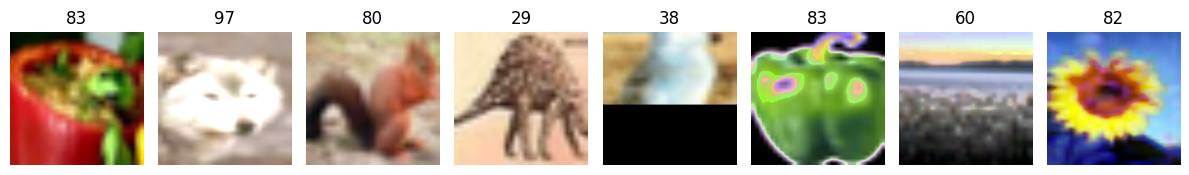

In [ ]:
# Function to show a batch of images
def show_batch(dl, n=8):
    imgs, labels = next(iter(dl))
    imgs = imgs[:n]
    labels = labels[:n]

    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        
        # unnormalize
        img = imgs[i]
        if isinstance(img, torch.Tensor):
            img = img.detach().cpu().permute(1, 2, 0).numpy() # CHW to HWC
        else:
            img = np.array(img)  # for PIL Image case

        # unnormalize
        img = img * np.array(CIFAR100_STD, dtype=np.float32) + np.array(CIFAR100_MEAN, dtype=np.float32)

        # clip to [0,1]
        img = np.clip(img, 0, 1)
        img = (img * 255).astype(np.uint8)

      
        plt.imshow(img)
        plt.title(int(labels[i]))
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show a batch of training images
show_batch(train_loader, n=8)

### EfficientNet-B0 (Model Architecture)

- ปรับให้รองรับ CIFAR-100 (100 classes) โดยภาพต้นฉบับมีขนาด 32×32 พิกเซล แต่ถูก ขยายเป็น 224×224 ก่อนเข้าสู่โมเดล เพื่อให้ตรงกับสถาปัตยกรรมที่ออกแบบมาสำหรับ ImageNet

- EfficientNet-B0 ประกอบด้วย สถาปัตยกรรม convolutional network ที่ถูกออกแบบด้วยแนวคิด “compound scaling” — การเพิ่มความลึก (depth), ความกว้าง (width), และความละเอียด (resolution) อย่างสมดุลเพื่อให้โมเดลมีประสิทธิภาพสูงสุดต่อจำนวนพารามิเตอร์

- โครงสร้างหลักของโมเดลคือ Mobile Inverted Bottleneck Convolution (MBConv) ซึ่งพัฒนามาจาก MobileNetV2 โดยเพิ่ม Squeeze-and-Excitation (SE) block เพื่อปรับน้ำหนักของแต่ละ channel ตามความสำคัญของ feature

- ใช้ Swish (SiLU) เป็นฟังก์ชันกระตุ้น (activation function) ซึ่งให้ผลลัพธ์ดีกว่า ReLU ในงานที่ต้องการความต่อเนื่องของ gradient

- ใช้ Batch Normalization (BN) แทน LRN (Local Response Normalization) แบบเก่า เพื่อเร่งการเรียนรู้และเพิ่มเสถียรภาพของการเทรน

- ใช้ Dropout (p=0.2) ก่อน fully connected layer สุดท้ายเพื่อลด overfitting

- ส่วนหัว (classifier) ของ EfficientNet-B0 เป็น 1×1 convolution → Global Average Pooling → Fully Connected Layer

- จำนวนพารามิเตอร์ทั้งหมดประมาณ 5.3 ล้านพารามิเตอร์ แต่ให้ความแม่นยำสูงกว่ารุ่นใหญ่อย่าง ResNet-152 ในงาน ImageNet

- สำหรับงานบน CIFAR-100 โมเดลนี้ถูกปรับให้ output layer มี 100 neurons (แทน 1000 ใน ImageNet) พร้อม activation แบบ Softmax สำหรับการจำแนกภาพ

In [72]:
# Squeeze-and-Excitation Block
class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=4):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Conv2d(in_channels, in_channels // reduction, kernel_size=1)
        self.fc2 = nn.Conv2d(in_channels // reduction, in_channels, kernel_size=1)
    
    def forward(self, x):
        w = F.adaptive_avg_pool2d(x, 1)
        w = F.silu(self.fc1(w))
        w = torch.sigmoid(self.fc2(w))
        return x * w

In [74]:
# MBConv (Mobile Inverted Bottleneck)
class MBConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, expand_ratio, reduction=4):
        super(MBConv, self).__init__()
        hidden_dim = in_channels * expand_ratio
        self.use_res_connect = (stride == 1 and in_channels == out_channels)

        layers = []
        if expand_ratio != 1:
            layers.append(nn.Conv2d(in_channels, hidden_dim, kernel_size=1, bias=False))
            layers.append(nn.BatchNorm2d(hidden_dim))
            layers.append(nn.SiLU())

        layers.extend([
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=kernel_size, stride=stride,
                      padding=kernel_size // 2, groups=hidden_dim, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.SiLU(),
            SEBlock(hidden_dim, reduction=reduction),
            nn.Conv2d(hidden_dim, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels)
        ])

        self.conv = nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        if self.use_res_connect:
            return x + out
        else:
            return out

In [75]:
# EfficientNet-B0 Main Class
class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=100):
        super(EfficientNetB0, self).__init__()

        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.SiLU()
        )

        # MBConv blocks (structure from paper Table 1)
        self.blocks = nn.Sequential(
            MBConv(32, 16, 3, 1, expand_ratio=1),
            MBConv(16, 24, 3, 2, expand_ratio=6),
            MBConv(24, 24, 3, 1, expand_ratio=6),
            MBConv(24, 40, 5, 2, expand_ratio=6),
            MBConv(40, 40, 5, 1, expand_ratio=6),
            MBConv(40, 80, 3, 2, expand_ratio=6),
            MBConv(80, 80, 3, 1, expand_ratio=6),
            MBConv(80, 80, 3, 1, expand_ratio=6),
            MBConv(80, 112, 5, 1, expand_ratio=6),
            MBConv(112, 112, 5, 1, expand_ratio=6),
            MBConv(112, 112, 5, 1, expand_ratio=6),
            MBConv(112, 192, 5, 2, expand_ratio=6),
            MBConv(192, 192, 5, 1, expand_ratio=6),
            MBConv(192, 192, 5, 1, expand_ratio=6),
            MBConv(192, 192, 5, 1, expand_ratio=6),
            MBConv(192, 320, 3, 1, expand_ratio=6),
        )

        # Head
        self.head = nn.Sequential(
            nn.Conv2d(320, 1280, kernel_size=1, bias=False),
            nn.BatchNorm2d(1280),
            nn.SiLU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Dropout(0.2),
        )

        # Classifier
        self.classifier = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.head(x)
        x = x.flatten(1)
        x = self.classifier(x)
        return x

In [76]:
num_classes = 100 # number of classes in CIFAR-100

# Create the model and move it to the device (MPS / CUDA / CPU)
model = EfficientNetB0(num_classes=num_classes).to(DEVICE)

# Show total number of parameters in the model
sum(p.numel() for p in model.parameters()), model

(7270948,
 EfficientNetB0(
   (stem): Sequential(
     (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): SiLU()
   )
   (blocks): Sequential(
     (0): MBConv(
       (conv): Sequential(
         (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
         (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (2): SiLU()
         (3): SEBlock(
           (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
           (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
         )
         (4): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       )
     )
     (1): MBConv(
       (conv): Sequential(
         (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), 

In [77]:
# Enable TF32 for MPS (Apple Silicon) for better performance
torch.backends.mps.allow_tf32 = True

### Loss, Optimizer, Metrics

In [79]:
# Hyperparameters
LR = 0.016 # learning rate
MOMENTUM = 0.9 # momentum for RMSprop
DECAY = 0.9 # decay (alpha) for RMSprop
EPOCHS = 20 # number of epochs
WEIGHT_DECAY = 1e-5 # weight decay (L2 regularization)
LABEL_SMOOTHING = 0.1 # label smoothing factor

# Loss function - CrossEntropyLoss with label smoothing
criterion = nn.CrossEntropyLoss(label_smoothing=LABEL_SMOOTHING)

# Optimizer - RMSprop
optimizer = torch.optim.RMSprop(
    model.parameters(),
    lr=LR,
    momentum=MOMENTUM,
    alpha=DECAY,     
    weight_decay=WEIGHT_DECAY
)

# Learning rate scheduler - ExponentialLR
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.97)

# Metrics
acc_metric_val = MulticlassAccuracy(num_classes=num_classes).to(DEVICE)
acc_metric_test = MulticlassAccuracy(num_classes=num_classes).to(DEVICE)

### Train / Validate Loop (with early stopping)

In [80]:
# Training function for one epoch

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)

        # Forward pass
        logits = model(x)
        loss = criterion(logits, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Metrics
        running_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return running_loss / total, correct / total

In [81]:
# Evaluation function

def evaluate(model, loader, criterion, metric):
    model.eval()
    metric.reset()
    running_loss, total = 0.0, 0
    with torch.no_grad():
        for x,y in loader:
            x,y = x.to(DEVICE), y.to(DEVICE)
            logits = model(x)
            loss = criterion(logits, y)
            running_loss += loss.item() * x.size(0)
            total += y.size(0)
            metric.update(logits, y)
    return running_loss/total, metric.compute().item()

In [83]:
# Training / Validation loop with early stopping

best_val_acc, best_state = 0.0, None
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

for epoch in range(1, EPOCHS + 1):
    start_time = time.time()

    # Train
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion)

    # Validation
    val_loss, val_acc = evaluate(model, val_loader, criterion, acc_metric_val)

    # Adjust learning rate
    scheduler.step()

    # Record history
    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    # Save best model (early stopping)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    elapsed = time.time() - start_time
    print(f"Epoch {epoch:02d} | "
          f"train loss {tr_loss:.4f} acc {tr_acc:.4f} | "
          f"val loss {val_loss:.4f} acc {val_acc:.4f} | "
          f"time {elapsed:.1f}s")

/Users/morse/Documents/morse-workspaces/computer-vision-engineer/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 01 | train loss 12.0266 acc 0.0100 | val loss 2485.0344 acc 0.0089 | time 604.0s
Epoch 02 | train loss 5.8174 acc 0.0097 | val loss 63358.2885 acc 0.0100 | time 602.4s
Epoch 03 | train loss 4.7530 acc 0.0100 | val loss 4.6985 acc 0.0100 | time 598.3s
Epoch 04 | train loss 4.7203 acc 0.0100 | val loss 32773.7801 acc 0.0100 | time 563.9s
Epoch 05 | train loss 4.7190 acc 0.0098 | val loss 4.7217 acc 0.0100 | time 572.5s
Epoch 06 | train loss 4.7189 acc 0.0102 | val loss 4.7129 acc 0.0100 | time 581.4s
Epoch 07 | train loss 4.7185 acc 0.0097 | val loss 17041.1280 acc 0.0068 | time 559.2s
Epoch 08 | train loss 4.7178 acc 0.0095 | val loss 4.6993 acc 0.0100 | time 564.5s
Epoch 09 | train loss 4.7145 acc 0.0099 | val loss 11770.4504 acc 0.0125 | time 615.1s
Epoch 10 | train loss 4.7135 acc 0.0096 | val loss 20639.7215 acc 0.0100 | time 599.9s
Epoch 11 | train loss 4.7130 acc 0.0095 | val loss 79.5524 acc 0.0100 | time 587.0s
Epoch 12 | train loss 4.7120 acc 0.0100 | val loss 7.6271 acc 

In [84]:
# Load the best model state (early stopping)
if best_state is not None:
    model.load_state_dict(best_state)
    model.to(DEVICE)

### Plot Accuracy & Loss per Epoch

In [ ]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history["train_loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history["train_acc"], label="Train Accuracy")
plt.plot(epochs, history["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Test & Evaluate (accuracy, confusion matrix, per-class report)

In [86]:
# Evaluate on test set
test_loss, test_acc = evaluate(model, test_loader, criterion, acc_metric_test)
print(f"TEST | loss {test_loss:.4f} | acc {test_acc:.4f}")

TEST | loss 4395.4099 | acc 0.0142


In [87]:
# Confusion Matrix
cm_metric = MulticlassConfusionMatrix(num_classes=num_classes).to(DEVICE)
model.eval()
cm_metric.reset()

# Compute confusion matrix
with torch.no_grad():
    for x,y in test_loader:
        x,y = x.to(DEVICE), y.to(DEVICE)
        logits = model(x)
        cm_metric.update(logits, y)
cm = cm_metric.compute().cpu().numpy()

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (MNIST)')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks); plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted'); plt.ylabel('True')
plt.tight_layout()
plt.show()

In [89]:
# Save the model checkpoint
Path("checkpoints").mkdir(exist_ok=True)
torch.save(model.state_dict(), "checkpoints/efficientnet_b0_cifar100.pt")

In [90]:
# Load the model checkpoint
model_pretrained = EfficientNetB0().to(DEVICE)
model_pretrained.load_state_dict(torch.load("checkpoints/efficientnet_b0_cifar100.pt", map_location=DEVICE))
model_pretrained.eval()

EfficientNetB0(
  (stem): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
  )
  (blocks): Sequential(
    (0): MBConv(
      (conv): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): SEBlock(
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (4): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): MBConv(
      (conv): Sequential(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNor